In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("unemployment.csv")

In [4]:
print(df.head())
print(df.info())
print(df.describe())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139                                     43.24  Rural  
1             11755881                                     42.05  Rural  
2             12086707                                     43.50  Rural  
3             12285693                                     43.97  Rural  
4             12256762                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data colu

In [6]:
df.columns = df.columns.str.strip()

In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
# Check for missing values
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


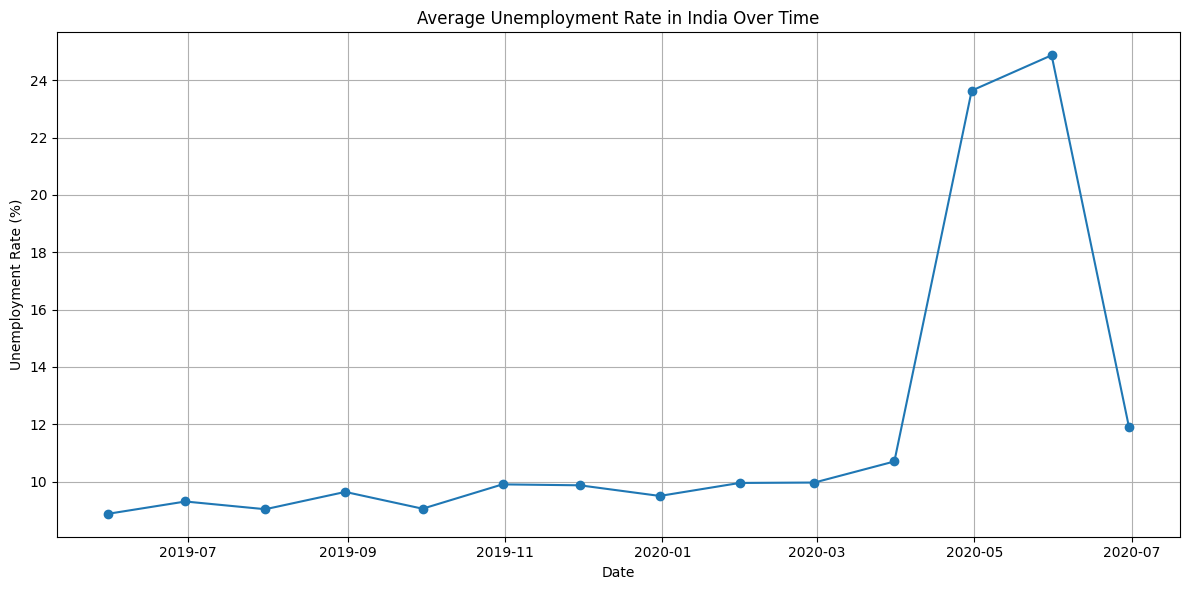

In [9]:
# Overall unemployment trend over time
plt.figure(figsize=(12,6))
df_grouped = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(df_grouped.index, df_grouped.values, marker='o')
plt.title('Average Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

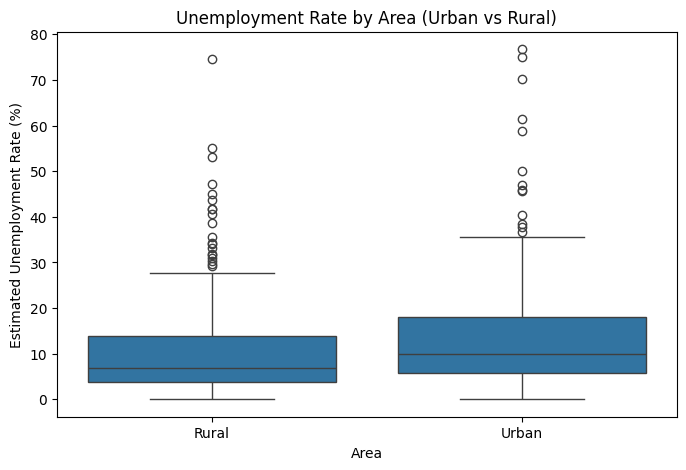

In [10]:
# Boxplot of unemployment rate by Area
plt.figure(figsize=(8,5))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate by Area (Urban vs Rural)')
plt.show()

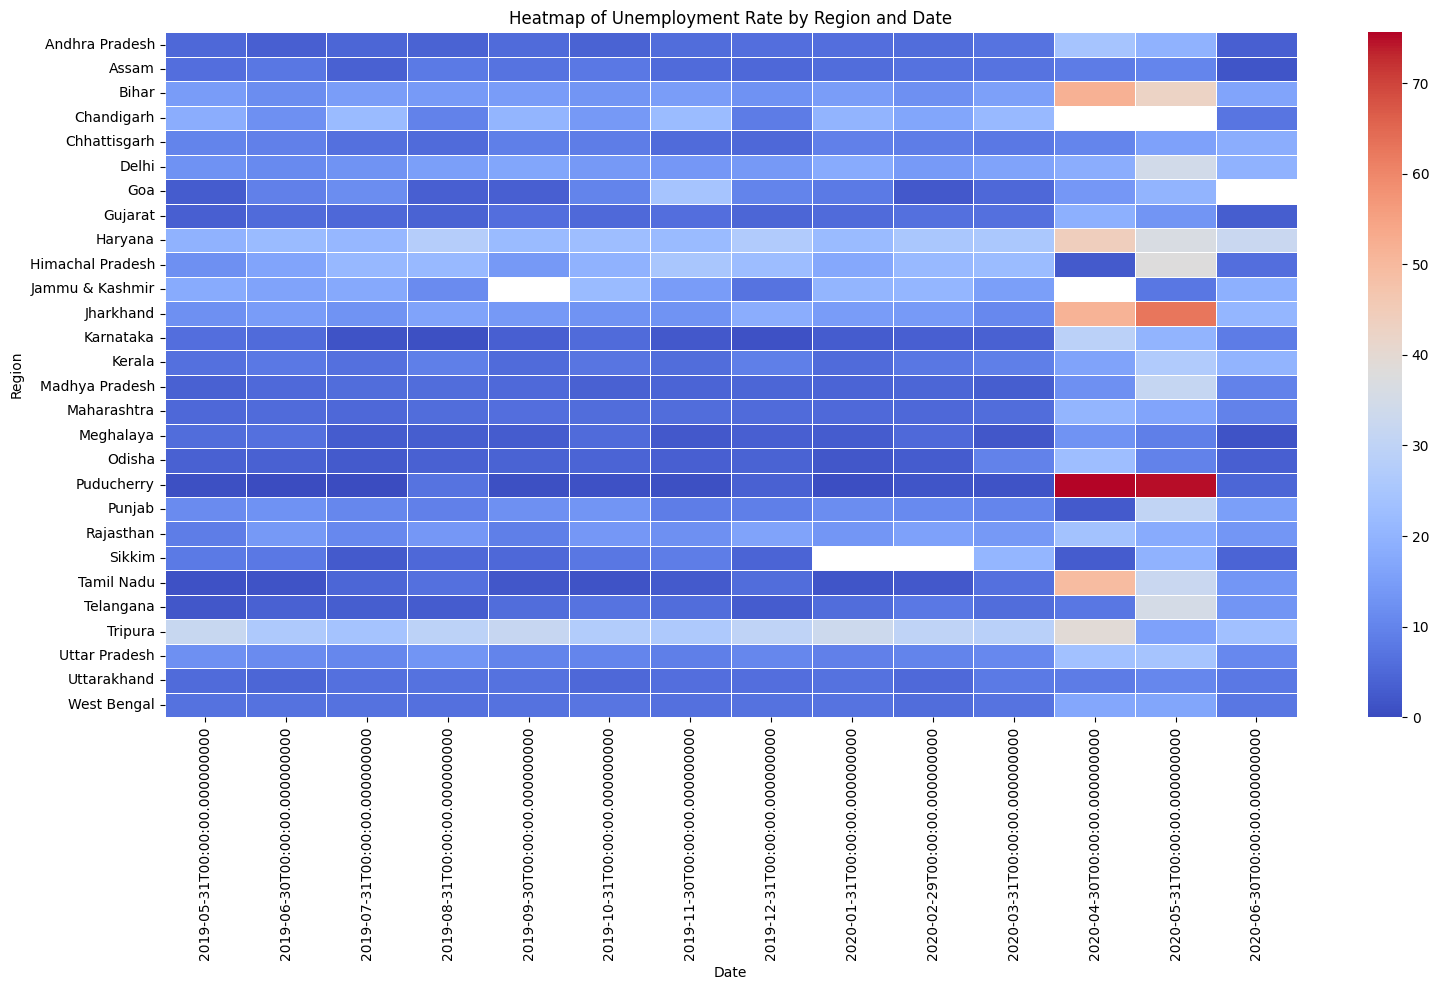

In [11]:
# Heatmap - Unemployment by Region and Date
pivot = df.pivot_table(index='Region', columns='Date', values='Estimated Unemployment Rate (%)')
plt.figure(figsize=(16,10))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Unemployment Rate by Region and Date')
plt.tight_layout()
plt.show()

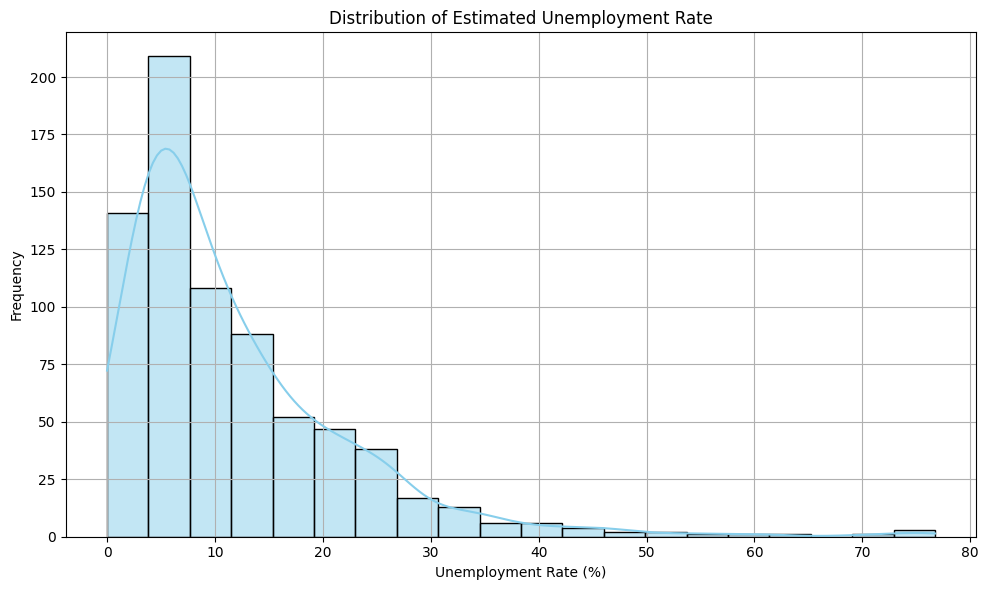

In [12]:
# Histogram of Unemployment Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Estimated Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()